In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
import math

In [2]:
def inp(w, x, b):
    return w * x + b


def out(t):
    return np.tanh(t)


def neuron(w, x, b):
    return out(inp(w, x, b))


def tanh_deriv(x):
    t = np.tanh(x)**2
    return 1.0 - t


def neuron_der_b(w, x, b):
    return tanh_deriv(inp(w, x, b))
  
    
def neuron_der_w(w, x, b):
    return tanh_deriv(inp(w, x, b)) * x


def pred(x, w11_x, w11_b, w21_x, w2_b):
    return (w21_x * neuron(w11_x, x, w11_b) + w2_b)


def func(x):
    return np.sin(math.pi / 2 * x + math.pi / 2)


def loss(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = (p - func(item)) * (p - func(item))
        l = l + sq
    print "Loss = " + str(l)
    return l


def loss_deriv_w2_b(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item))
        l = l + sq
#    print "Loss_deriv_w2_b = " + str(l)
    return l


def loss_deriv_w21_x(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * neuron(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w21_x = " + str(l)
    return l    



def loss_deriv_w11_x(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_w(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w21_x = " + str(l)
    return l    


def loss_deriv_w11_b(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_b(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w11_b = " + str(l)
    return l



In [3]:
epochs = 1000

step_lin_w_x = 0.001
step_lin_w_b = 0.01

#x = np.arange(0, math.pi, 0.05)
x = np.arange(0, 1.05, 0.05)
print x
y = func(x)
print y

w11_x = uniform(0, 1)
w11_b = uniform(0, 1)

w12_x = uniform(0, 1)
w12_b = uniform(0, 1)

w21_x = - uniform(0, 1)

w2_b  = uniform(0, 1)


[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]
[  1.00000000e+00   9.96917334e-01   9.87688341e-01   9.72369920e-01
   9.51056516e-01   9.23879533e-01   8.91006524e-01   8.52640164e-01
   8.09016994e-01   7.60405966e-01   7.07106781e-01   6.49448048e-01
   5.87785252e-01   5.22498565e-01   4.53990500e-01   3.82683432e-01
   3.09016994e-01   2.33445364e-01   1.56434465e-01   7.84590957e-02
   1.22464680e-16]


<IPython.core.display.Javascript object>


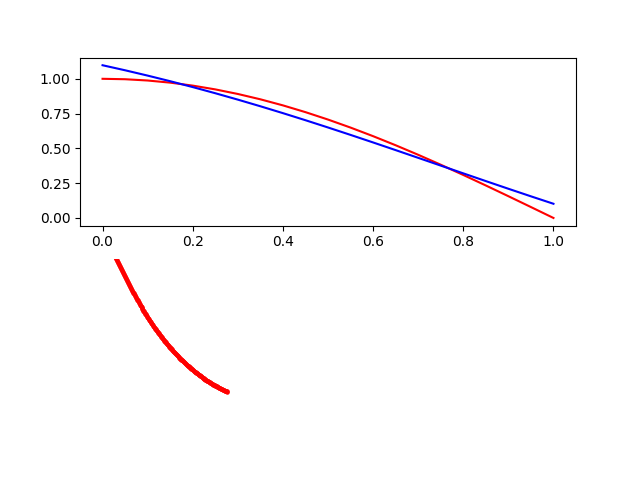

(0, 1)

In [25]:
#fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex = False, sharey = False)

fig,(ax1, ax2) = plt.subplots(2,1, sharex = False, sharey = False)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0, 1.05)
ax1.set_ylim(0, 2)
ax1.set_xlabel("X")
ax1.plot(x, y, color = 'r')

ax2.set_xlabel("Step")
ax2.set_ylabel("Loss")
ax2.set_xlim(0, epochs)
ax2.set_ylim(0, 1)



In [26]:
for i in range(epochs):
    l = loss(x, w11_x, w11_b, w21_x, w2_b)
    ax2.scatter(i, l, color = 'r', s=5)
    
    w21_x_new = w21_x - step_lin_w_x * loss_deriv_w21_x(x, w11_x, w11_b, w21_x, w2_b)

    w2_b_new = w2_b - step_lin_w_b * loss_deriv_w2_b(x, w11_x, w11_b, w21_x, w2_b)

    w11_x_new = w11_x - step_lin_w_x * loss_deriv_w11_x(x, w11_x, w11_b, w21_x, w2_b)
    w11_b_new = w11_b - step_lin_w_b * loss_deriv_w11_b(x, w11_x, w11_b, w21_x, w2_b)
        
    w21_x = w21_x_new
    w2_b = w2_b_new
    
    w11_x = w11_x_new
    w11_b = w11_b_new
 
    print "w11_x = " + str(w11_x)
    print "w11_b = " + str(w11_b)
    print "w21_x = " + str(w21_x)
    print "w2_b = " + str(w2_b)
    
    z = pred(x, w11_x, w11_b, w21_x, w2_b)
    ax1.clear()
    #print x
    #print y
    ax1.plot(x, y, color = 'r')
    ax1.plot(x, z, color = 'b')
    
    fig.canvas.draw()
    


Loss = 27.6971428577
w11_x = 0.367083135678
w11_b = 0.627250094864
w21_x = -0.785997550265
w2_b = 0.601235633185
Loss = 7.98233270663
w11_x = 0.363562034815
w11_b = 0.51939692374
w21_x = -0.771252369096
w2_b = 0.832923901945
Loss = 2.94992659017
w11_x = 0.36232095123
w11_b = 0.458941753872
w21_x = -0.765445380454
w2_b = 0.942129809428
Loss = 1.77973982545
w11_x = 0.362445887262
w11_b = 0.426557754292
w21_x = -0.763494363517
w2_b = 0.991105646504
Loss = 1.5248118656
w11_x = 0.363279581019
w11_b = 0.408600630839
w21_x = -0.763193543603
w2_b = 1.01187414437
Loss = 1.46799675097
w11_x = 0.364453937912
w11_b = 0.397495441609
w21_x = -0.763604463234
w2_b = 1.01984721291
Loss = 1.45160136883
w11_x = 0.365787204138
w11_b = 0.389517591513
w21_x = -0.764325651088
w2_b = 1.02211912111
Loss = 1.44316594541
w11_x = 0.367194934597
w11_b = 0.382940519158
w21_x = -0.76518398249
w2_b = 1.02187424721
Loss = 1.43625400569
w11_x = 0.368639023315
w11_b = 0.376986632159
w21_x = -0.766104501502
w2_b = 1.0205

w21_x = -0.836866235079
w2_b = 0.872880530583
Loss = 0.99460451136
w11_x = 0.475314837791
w11_b = 0.0575734750418
w21_x = -0.838033503265
w2_b = 0.870777312977
Loss = 0.988343744515
w11_x = 0.477009507516
w11_b = 0.0536133885808
w21_x = -0.839201785989
w2_b = 0.86868549254
Loss = 0.982107273454
w11_x = 0.478704356329
w11_b = 0.0496818414887
w21_x = -0.840371030173
w2_b = 0.866605215288
Loss = 0.975895346345
w11_x = 0.480399297663
w11_b = 0.0457787782157
w21_x = -0.841541183247
w2_b = 0.864536620042
Loss = 0.969708199341
w11_x = 0.482094245795
w11_b = 0.041904136606
w21_x = -0.842712193143
w2_b = 0.86247983852
Loss = 0.963546056893
w11_x = 0.483789115862
w11_b = 0.038057848115
w21_x = -0.843884008293
w2_b = 0.860434995437
Loss = 0.957409132069
w11_x = 0.485483823869
w11_b = 0.0342398380243
w21_x = -0.845056577623
w2_b = 0.858402208604
Loss = 0.951297626872
w11_x = 0.487178286699
w11_b = 0.0304500256537
w21_x = -0.846229850554
w2_b = 0.856381589036
Loss = 0.945211732557
w11_x = 0.4888724

Loss = 0.612272579002
w11_x = 0.593537683882
w11_b = -0.162174366597
w21_x = -0.921927274209
w2_b = 0.752257622277
Loss = 0.607953190902
w11_x = 0.595076299489
w11_b = -0.16443727169
w21_x = -0.923055853684
w2_b = 0.751046804614
Loss = 0.603660032422
w11_x = 0.596611045489
w11_b = -0.166682911591
w21_x = -0.924182637152
w2_b = 0.749846165744
Loss = 0.599393039905
w11_x = 0.598141892429
w11_b = -0.168911455319
w21_x = -0.925307597945
w2_b = 0.748655612204
Loss = 0.595152149054
w11_x = 0.599668811425
w11_b = -0.171123070854
w21_x = -0.926430709664
w2_b = 0.747475050267
Loss = 0.59093729495
w11_x = 0.601191774155
w11_b = -0.173317925112
w21_x = -0.927551946176
w2_b = 0.74630438598
Loss = 0.586748412068
w11_x = 0.602710752854
w11_b = -0.17549618393
w21_x = -0.928671281619
w2_b = 0.745143525207
Loss = 0.582585434295
w11_x = 0.604225720312
w11_b = -0.177658012047
w21_x = -0.929788690395
w2_b = 0.743992373666
Loss = 0.57844829494
w11_x = 0.605736649859
w11_b = -0.179803573087
w21_x = -0.93090

Loss = 0.363984133542
w11_x = 0.693181491387
w11_b = -0.2898440751
w21_x = -0.997273472557
w2_b = 0.685653990076
Loss = 0.361360105095
w11_x = 0.694394806982
w11_b = -0.291225248218
w21_x = -0.998220109179
w2_b = 0.684948944346
Loss = 0.35875646234
w11_x = 0.695603288957
w11_b = -0.292598295836
w21_x = -0.999163688468
w2_b = 0.684248095882
Loss = 0.35617310841
w11_x = 0.69680693685
w11_b = -0.2939633039
w21_x = -1.00010420187
w2_b = 0.683551382192
Loss = 0.353609946097
w11_x = 0.698005750467
w11_b = -0.295320357416
w21_x = -1.00104164107
w2_b = 0.682858741417
Loss = 0.351066877866
w11_x = 0.699199729884
w11_b = -0.296669540458
w21_x = -1.00197599796
w2_b = 0.682170112329
Loss = 0.348543805854
w11_x = 0.700388875438
w11_b = -0.298010936177
w21_x = -1.00290726469
w2_b = 0.681485434331
Loss = 0.346040631883
w11_x = 0.70157318773
w11_b = -0.299344626812
w21_x = -1.0038354336
w2_b = 0.680804647448
Loss = 0.343557257462
w11_x = 0.702752667618
w11_b = -0.300670693696
w21_x = -1.00476049727
w2

Loss = 0.219732026861
w11_x = 0.769275040878
w11_b = -0.373770515519
w21_x = -1.05804188401
w2_b = 0.641969260641
Loss = 0.218329508978
w11_x = 0.770148158895
w11_b = -0.374735383873
w21_x = -1.05875572481
w2_b = 0.64144206163
Loss = 0.216939939375
w11_x = 0.771016955475
w11_b = -0.375696458387
w21_x = -1.05946640515
w2_b = 0.640915940755
Loss = 0.215563218992
w11_x = 0.771881443178
w11_b = -0.376653777726
w21_x = -1.06017392965
w2_b = 0.640390871942
Loss = 0.214199249049
w11_x = 0.772741634665
w11_b = -0.377607380153
w21_x = -1.06087830307
w2_b = 0.639866829466
Loss = 0.212847931059
w11_x = 0.773597542686
w11_b = -0.378557303525
w21_x = -1.0615795303
w2_b = 0.639343787949
Loss = 0.211509166827
w11_x = 0.774449180089
w11_b = -0.379503585307
w21_x = -1.06227761632
w2_b = 0.638821722355
Loss = 0.210182858464
w11_x = 0.77529655981
w11_b = -0.380446262571
w21_x = -1.06297256627
w2_b = 0.638300607987
Loss = 0.208868908388
w11_x = 0.776139694875
w11_b = -0.381385372001
w21_x = -1.06366438538

Loss = 0.145605646824
w11_x = 0.822516664881
w11_b = -0.436260951991
w21_x = -1.10224800341
w2_b = 0.605026477612
Loss = 0.144911312624
w11_x = 0.823111513115
w11_b = -0.437029602588
w21_x = -1.10274945203
w2_b = 0.604527703639
Loss = 0.144223739434
w11_x = 0.823703109578
w11_b = -0.43779645303
w21_x = -1.10324831557
w2_b = 0.604028829924
Loss = 0.14354285984
w11_x = 0.824291469825
w11_b = -0.438561521638
w21_x = -1.10374460406
w2_b = 0.603529848211
Loss = 0.142868606927
w11_x = 0.824876609405
w11_b = -0.439324826547
w21_x = -1.10423832754
w2_b = 0.60303075041
Loss = 0.142200914276
w11_x = 0.825458543864
w11_b = -0.440086385707
w21_x = -1.1047294961
w2_b = 0.602531528583
Loss = 0.141539715964
w11_x = 0.82603728874
w11_b = -0.440846216886
w21_x = -1.10521811984
w2_b = 0.602032174955
Loss = 0.140884946565
w11_x = 0.826612859567
w11_b = -0.441604337671
w21_x = -1.10570420889
w2_b = 0.601532681902
Loss = 0.14023654115
w11_x = 0.827185271869
w11_b = -0.442360765468
w21_x = -1.10618777339
w2

Loss = 0.109020448698
w11_x = 0.858345997446
w11_b = -0.488600838195
w21_x = -1.13270094794
w2_b = 0.567992476253
Loss = 0.108672214383
w11_x = 0.858743255665
w11_b = -0.489276220019
w21_x = -1.13304084059
w2_b = 0.567473109538
Loss = 0.108327047436
w11_x = 0.859138341608
w11_b = -0.489950736207
w21_x = -1.13337890229
w2_b = 0.566953374183
Loss = 0.107984912802
w11_x = 0.859531268777
w11_b = -0.490624394905
w21_x = -1.13371514309
w2_b = 0.566433270145
Loss = 0.107645775786
w11_x = 0.859922050632
w11_b = -0.491297204159
w21_x = -1.13404957301
w2_b = 0.565912797459
Loss = 0.107309602052
w11_x = 0.860310700588
w11_b = -0.491969171909
w21_x = -1.13438220205
w2_b = 0.565391956228
Loss = 0.106976357621
w11_x = 0.860697232012
w11_b = -0.492640306
w21_x = -1.13471304017
w2_b = 0.564870746631
Loss = 0.106646008865
w11_x = 0.861081658229
w11_b = -0.493310614171
w21_x = -1.13504209734
w2_b = 0.564349168919
Loss = 0.106318522508
w11_x = 0.861463992517
w11_b = -0.493980104066
w21_x = -1.13536938349

Loss = 0.0900326706065
w11_x = 0.882152995774
w11_b = -0.535406332353
w21_x = -1.1530661389
w2_b = 0.529718907633
Loss = 0.0898345952036
w11_x = 0.882425517279
w11_b = -0.536034834253
w21_x = -1.15329830524
w2_b = 0.529176540811
Loss = 0.0896378352537
w11_x = 0.882696714898
w11_b = -0.536662836916
w21_x = -1.1535292931
w2_b = 0.528633948162
Loss = 0.0894423753469
w11_x = 0.88296659857
w11_b = -0.537290342845
w21_x = -1.15375911035
w2_b = 0.528091133182
Loss = 0.0892482002631
w11_x = 0.883235178183
w11_b = -0.537917354488
w21_x = -1.15398776486
w2_b = 0.527548099397
Loss = 0.0890552949701
w11_x = 0.883502463575
w11_b = -0.538543874237
w21_x = -1.15421526443
w2_b = 0.527004850358
Loss = 0.0888636446216
w11_x = 0.883768464531
w11_b = -0.539169904429
w21_x = -1.15444161686
w2_b = 0.526461389641
Loss = 0.0886732345552
w11_x = 0.884033190787
w11_b = -0.539795447344
w21_x = -1.15466682988
w2_b = 0.52591772085
Loss = 0.0884840502906
w11_x = 0.884296652028
w11_b = -0.54042050521
w21_x = -1.1548

Loss = 0.0783842463276
w11_x = 0.898931925028
w11_b = -0.579481055553
w21_x = -1.16720397816
w2_b = 0.490320886601
Loss = 0.0782509729193
w11_x = 0.899131562287
w11_b = -0.580077181957
w21_x = -1.16736934969
w2_b = 0.489772317441
Loss = 0.0781182866551
w11_x = 0.8993304655
w11_b = -0.580672875702
w21_x = -1.16753402075
w2_b = 0.489223815185
Loss = 0.0779861815422
w11_x = 0.899528641153
w11_b = -0.581268136505
w21_x = -1.16769799671
w2_b = 0.488675384106
Loss = 0.0778546516692
w11_x = 0.89972609569
w11_b = -0.581862964059
w21_x = -1.16786128294
w2_b = 0.488127028474
Loss = 0.0777236912051
w11_x = 0.899922835514
w11_b = -0.582457358037
w21_x = -1.16802388474
w2_b = 0.487578752553
Loss = 0.0775932943984
w11_x = 0.90011886698
w11_b = -0.583051318089
w21_x = -1.1681858074
w2_b = 0.487030560606
Loss = 0.077463455576
w11_x = 0.900314196404
w11_b = -0.583644843846
w21_x = -1.16834705617
w2_b = 0.486482456888
Loss = 0.0773341691419
w11_x = 0.900508830057
w11_b = -0.584237934914
w21_x = -1.16850

Loss = 0.0700026109037
w11_x = 0.911773889635
w11_b = -0.62126159363
w21_x = -1.17760885364
w2_b = 0.451241730738
Loss = 0.069900214114
w11_x = 0.911934822133
w11_b = -0.621824888143
w21_x = -1.17773568789
w2_b = 0.450708377104
Loss = 0.0697981288091
w11_x = 0.912095385815
w11_b = -0.622387693773
w21_x = -1.17786213107
w2_b = 0.450175371676
Loss = 0.0696963527548
w11_x = 0.912255584443
w11_b = -0.622950009499
w21_x = -1.17798818646
w2_b = 0.449642717782
Loss = 0.0695948837464
w11_x = 0.912415421747
w11_b = -0.623511834305
w21_x = -1.17811385732
w2_b = 0.449110418731
Loss = 0.0694937196081
w11_x = 0.912574901425
w11_b = -0.62407316717
w21_x = -1.17823914687
w2_b = 0.448578477811
Loss = 0.0693928581931
w11_x = 0.912734027144
w11_b = -0.624634007078
w21_x = -1.17836405831
w2_b = 0.448046898289
Loss = 0.0692922973824
w11_x = 0.912892802538
w11_b = -0.625194353011
w21_x = -1.17848859481
w2_b = 0.447515683412
Loss = 0.0691920350849
w11_x = 0.913051231213
w11_b = -0.625754203953
w21_x = -1.17

Loss = 0.0633179222445
w11_x = 0.922612336563
w11_b = -0.660511128721
w21_x = -1.18591268376
w2_b = 0.413906712064
Loss = 0.0632336180015
w11_x = 0.922754606285
w11_b = -0.661036809424
w21_x = -1.18601836617
w2_b = 0.413405642978
Loss = 0.063149518594
w11_x = 0.922896706763
w11_b = -0.661561938318
w21_x = -1.18612383659
w2_b = 0.412905105506
Loss = 0.0630656230728
w11_x = 0.923038639893
w11_b = -0.66208651479
w21_x = -1.1862290968
w2_b = 0.412405101362
Loss = 0.0629819304979
w11_x = 0.923180407552
w11_b = -0.66261053824
w21_x = -1.18633414855
w2_b = 0.41190563224
Loss = 0.062898439939
w11_x = 0.923322011596
w11_b = -0.663134008074
w21_x = -1.18643899361
w2_b = 0.411406699809
Loss = 0.0628151504745
w11_x = 0.923463453863
w11_b = -0.66365692371
w21_x = -1.1865436337
w2_b = 0.410908305716
Loss = 0.062732061192
w11_x = 0.923604736168
w11_b = -0.664179284574
w21_x = -1.18664807054
w2_b = 0.410410451586
Loss = 0.0626491711881
w11_x = 0.92374586031
w11_b = -0.664701090103
w21_x = -1.186752305

Loss = 0.0577229096801
w11_x = 0.932517569295
w11_b = -0.696923339521
w21_x = -1.19307071832
w2_b = 0.379268441021
Loss = 0.0576513653397
w11_x = 0.932651445896
w11_b = -0.697408314621
w21_x = -1.19316481607
w2_b = 0.378808750625
Loss = 0.0575799747689
w11_x = 0.932785246648
w11_b = -0.697892719146
w21_x = -1.19325879423
w2_b = 0.378349661691
Loss = 0.0575087374309
w11_x = 0.932918972343
w11_b = -0.698376553191
w21_x = -1.19335265367
w2_b = 0.377891174502
Loss = 0.0574376527921
w11_x = 0.933052623764
w11_b = -0.698859816861
w21_x = -1.19344639522
w2_b = 0.377433289324
Loss = 0.057366720322
w11_x = 0.933186201682
w11_b = -0.699342510271
w21_x = -1.19354001974
w2_b = 0.376976006407
Loss = 0.0572959394934
w11_x = 0.933319706859
w11_b = -0.699824633544
w21_x = -1.19363352805
w2_b = 0.376519325985
Loss = 0.0572253097822
w11_x = 0.933453140045
w11_b = -0.700306186812
w21_x = -1.19372692097
w2_b = 0.376063248275
Loss = 0.0571548306673
w11_x = 0.933586501978
w11_b = -0.700787170218
w21_x = -1.

KeyboardInterrupt: 